# 1. Introduction to Statistical learning

## 1.1 Work with data and EDA

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

**Рассмотрим объект типа DataFrame. Создадим свой DataFrame одним из способов.**

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame()
df['client'] = ['cl1', 'cl2', 'cl3', 'cl1', 'cl2', 'cl2', 'cl3']
df['year'] = [2020, 2020, 2020, 2018, 2018, 2019, 2019]
df['avg_salary'] = [80000, 60000, 70000, 60000, 40000, 50000, 60000]
df

,client,year,avg_salary
0,cl1,2020,80000
1,cl2,2020,60000
2,cl3,2020,70000
3,cl1,2018,60000
4,cl2,2018,40000
5,cl2,2019,50000
6,cl3,2019,60000


Раз pandas поддерживает sql - подобные запросы, то давайте сделаем один из них: выбере всех клиентов, у которых средняя годовая зарплата в 2020 больше 60000:

In [ ]:
df[(df['year'] == 2020)&(df['avg_salary'] > 60000)]

,client,year,avg_salary
0,cl1,2020,80000
2,cl3,2020,70000


Тоже самое можно сделать и с помощью обычного синтаксиса sql с помощью библиотеки pandasql:

In [ ]:
!pip install -U pandasql
!pip install pydbgen 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=a5a250d4171114171d1a315ea8ef6923ab9d695a21ea24cae5cda1f547672241
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.7 MB/s eta 0:00:00


In [ ]:
import pandasql as ps

ps.sqldf(
    '''
    SELECT *
    FROM df
    WHERE year = 2020 AND avg_salary > 60000
    '''
)

ObjectNotExecutableError: ignored

Также pandas поддерживает простейшие графики, например:

<AxesSubplot:>

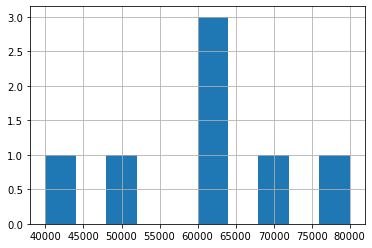

In [ ]:
df['avg_salary'].hist()

## 1.1.1 Load data

В общем случае pandas является удобной библиотекой для табличных данных.
Данные мы загружаем с помощью функции read_csv() библиотеки pandas. Они записаны в файле Auto.csv.
Разберем основные параметры функции read_csv():

```python
pandas.read_csv(
    filepath_or_buffer, # задает путь к файлу
    sep=',', # задает символ - разделитель полей
    delimeter=',', # задает символ - разделитель полей
    header='infer', # задает номер строки, содержащей имена столбцов 
    names=None, # Задает список с именами столбцов
    index_col=None, # задает столбец, значения которого будут использоваться в качестве меток строк датафрейма
    usecols=None, # Задает подмножество столбцов
    squeeze=False, # Если спарсенные данные содержат лишь один столбец, возвращает объект Series
    decimal='.', # задает символ - десятичный разделитель (по умолчанию .)
    encoding=None # задает тип кодировки
)
```

Давайте загрузим данные из файла и начнем их анализировать:

In [ ]:
df1 = pd.read_csv('./data/Auto.csv')

In [ ]:
# Смотрим на первые 5 строк
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
# Смотрим на последние 5 строк
df1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [ ]:
# Посмотрим на кол-во строк и столбцов
df1.shape

(397, 9)

## 1.1.2 Check NAs

In [ ]:
# проверка заполненности ячеек
print('Всего записей: ', df1.shape[0])
df1.notna().sum()

Всего записей:  397


mpg             397
cylinders       397
displacement    397
horsepower      392
weight          397
acceleration    397
year            397
origin          397
name            397
dtype: int64

In [ ]:
# Давайте выведем строки с пропущенными значениями horsepower
df1[df1['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
